<div class="alert alert-block alert-warning">

<h1><center><b>PART 2B. SONG POPULARITY</b></h1>
<h2><center><b>GROUP 9</b></h2>

<div class="alert alert-block alert-info">
<b>Importing Libraries</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, roc_auc_score
import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<div class="alert alert-block alert-info">
<b>Loading the dataset</b></div>

In [2]:
song_path = r'spotifydata.csv'
song_data = pd.read_csv(song_path)

In [3]:
print("EDA:")
print('\nSong Data:')
display(song_data.head())
print("Length of song dataset:", len(song_data))
display(song_data.describe())
display(song_data.isna().sum())
display(pd.DataFrame({'Column': song_data.columns, 'DType': [song_data[col].dtype for col in song_data.columns], 'NUniques': [song_data[col].nunique() for col in song_data.columns]}))

EDA:

Song Data:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Length of song dataset: 232725


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

,Column,DType,NUniques
0,genre,object,27
1,artist_name,object,14564
2,track_name,object,148615
3,track_id,object,176774
4,popularity,int64,101
5,acousticness,float64,4734
6,danceability,float64,1295
7,duration_ms,int64,70749
8,energy,float64,2517
9,instrumentalness,float64,5400




<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is about Exploratory Data Analysis (EDA) on the dataset. It displays first few data points, its length, statistical summary, count of missing values per column, and a tabulation displaying column names, their data types, and the number of unique values within each column.
</div>

In [4]:
#  Retrieve the keys present in the song_data dictionary
song_data.keys()

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>Checking Missing Values</b></div>

In [5]:
song_data.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

<div class="alert alert-block alert-info">
<b>Data Visualization</b> </div>



C:\Users\patel\AppData\Local\Temp\ipykernel_12888\3871686646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_data['popularity']).set_title('Popularity Distribution')


Text(0.5, 1.0, 'Popularity Distribution')

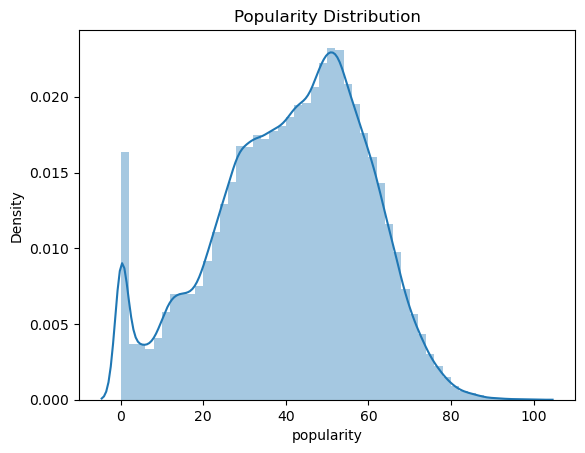

In [6]:
sns.distplot(song_data['popularity']).set_title('Popularity Distribution')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code is to plot the distribution plot (distplot) for the 'popularity' column. Using this, we are visualizing the distribution of popularity scores among the songs.
</div>

Visualizing Correlation Among Song Data Features Using Heatmap

C:\Users\patel\AppData\Local\Temp\ipykernel_12888\2112152709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = song_data.corr()


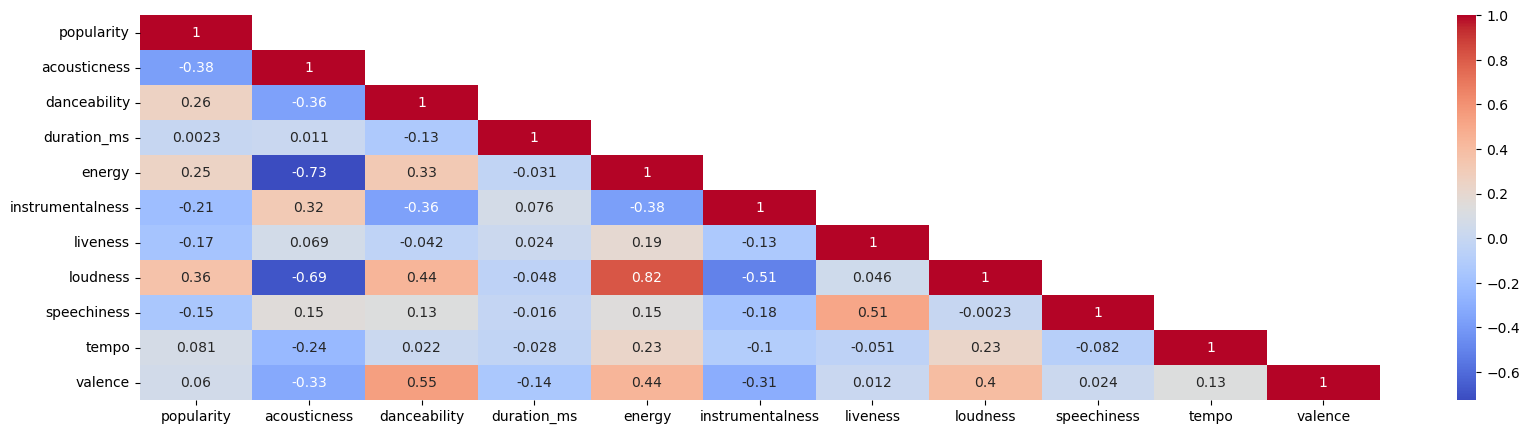

In [7]:
correlation = song_data.corr()
fig = plt.figure(figsize=(20,5))
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)
sns.heatmap(correlation, annot=True, cmap="coolwarm", mask=mask)
plt.show()

Visualization of Popularity Based on Time Signature

Text(0.5, 1.0, 'Popularity Based on Time Signature')

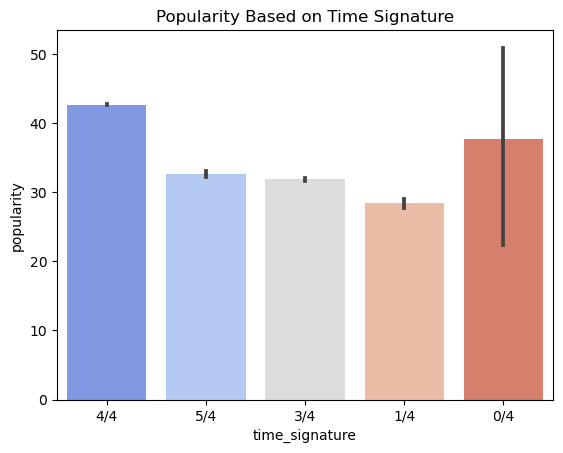

In [8]:
sns.barplot(x = 'time_signature', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Time Signature')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to showcase the relationship between the time signature of songs and their respective popularity levels
</div>

Popularity Distribution Across Different Musical Keys

Text(0.5, 1.0, 'Popularity Based on Key')

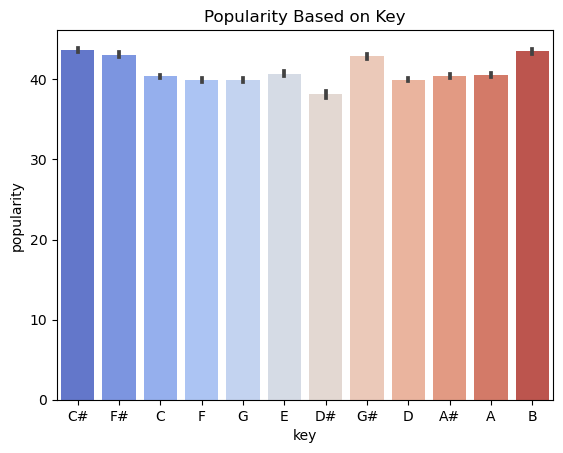

In [9]:
sns.barplot(x = 'key', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Key')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to show how popularity varies across different musical keys, mainly to understand relationships between key and music popularity.
</div>

Popularity Based on Musical Mode

Text(0.5, 1.0, 'Popularity Based on Mode')

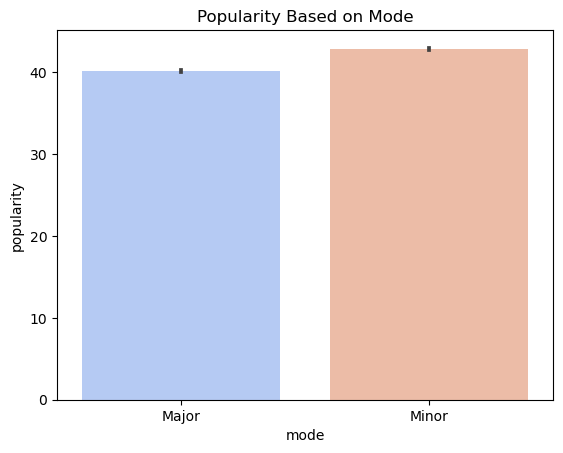

In [10]:
sns.barplot(x = 'mode', y = 'popularity', data = song_data, palette='coolwarm')
plt.title('Popularity Based on Mode')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- We created a bar plot to show the relationship between musical mode and song popularity
</div>

Distribution of Acousticness in Songs with Popularity Above 70

C:\Users\patel\AppData\Local\Temp\ipykernel_12888\1018885752.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_songs['acousticness'])


Text(0.5, 1.0, 'Acoustiness for Songs with More than 70 Popularity')

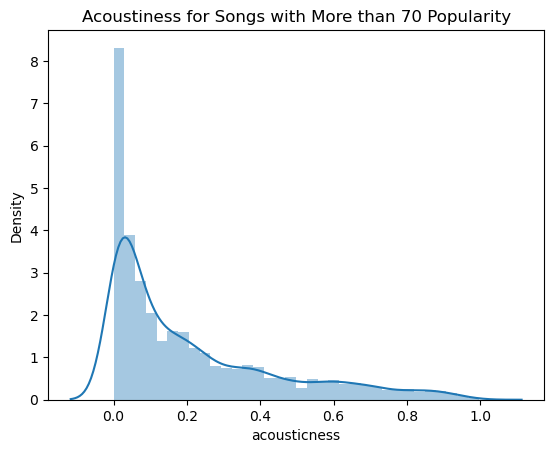

In [11]:
popular_songs = song_data[song_data.popularity > 70]
sns.distplot(popular_songs['acousticness'])
plt.title('Acoustiness for Songs with More than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code filters songs with a popularity score above 70 from the dataset and visualization is performed specifically for acousticness
</div>

Distribution of Acousticness in Songs with Popularity Below 70

C:\Users\patel\AppData\Local\Temp\ipykernel_12888\228728011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs['acousticness'])


Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

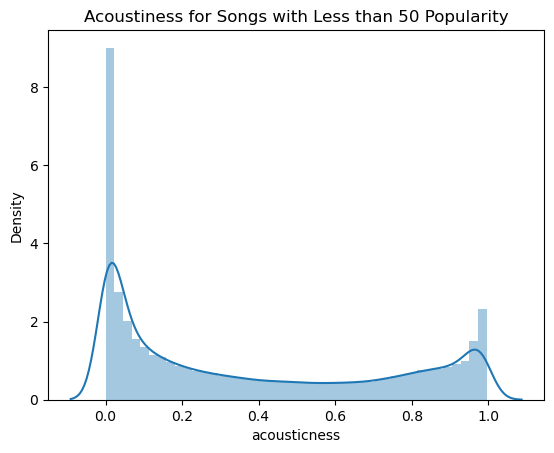

In [12]:
unpopular_songs = song_data[song_data.popularity < 70]
sns.distplot(unpopular_songs['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- The code filters songs with a popularity score below 70 from the dataset and visualization is performed specifically for acousticness
</div>

Distribution of Loudness for Highly Popular Songs

C:\Users\patel\AppData\Local\Temp\ipykernel_12888\1995242145.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(popular_songs['loudness'])


Text(0.5, 1.0, 'Loudness for Songs with More than 70 Popularity')

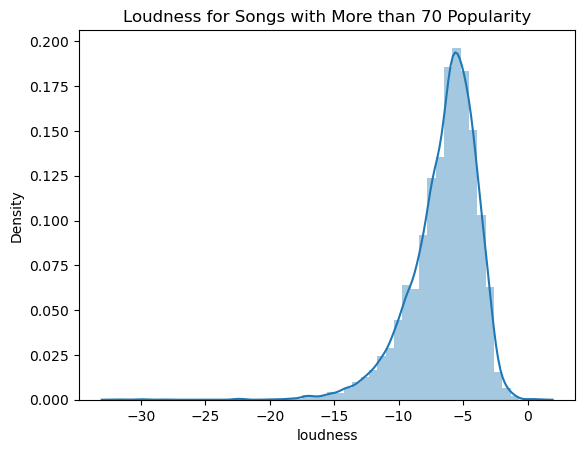

In [13]:
sns.distplot(popular_songs['loudness'])
plt.title('Loudness for Songs with More than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Visualizing the distribution of loudness for songs with a popularity above 70, giving information about the loudness patterns within the list of highly popular songs.
</div>

Distribution of Loudness for Less Popular Songs

C:\Users\patel\AppData\Local\Temp\ipykernel_12888\1000170378.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(unpopular_songs['loudness'])


Text(0.5, 1.0, 'Loudness for Songs with Less than 70 Popularity')

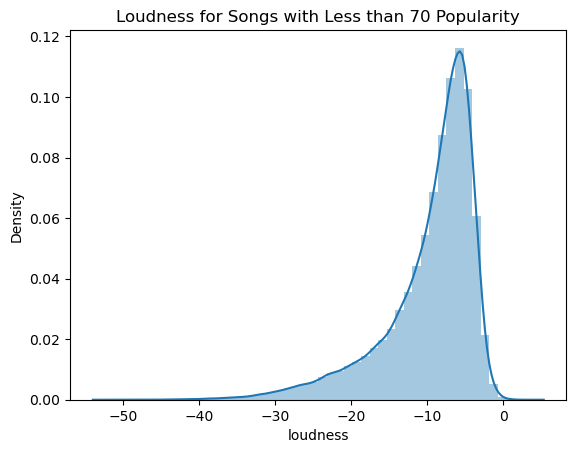

In [14]:
unpopular_songs = song_data[song_data.popularity < 70]
sns.distplot(unpopular_songs['loudness'])
plt.title('Loudness for Songs with Less than 70 Popularity')

<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Visualizing the distribution of loudness for songs with a popularity below 70, giving information about the loudness patterns within the list of less popular songs.
</div>

<div class="alert alert-block alert-info">
<b>Data Preparation</b> </div>



Encoding Categorical Keys in Song Data

In [15]:
unique_keys = song_data['key'].unique()
for i in range(len(unique_keys)):
    song_data.loc[song_data['key'] == unique_keys[i], 'key'] = i
song_data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
48743,Blues,Joe Cocker,Woman To Woman,0K3Dem9aRwRG9DVo0W2T3o,34,0.1780,0.711,270693,0.337,0.097000,0,0.0716,-14.364,Major,0.0908,180.612,4/4,0.801
6842,Alternative,Ayelle,Obvious,2ySyV2K8WnOqsQ0CfBNdnx,54,0.2840,0.690,160000,0.332,0.000513,3,0.0931,-11.148,Minor,0.1780,148.025,4/4,0.477
68302,Hip-Hop,"Tyler, The Creator",I Ain't Got Time!,430qNtapCS3Ue1yoSql1oV,65,0.0539,0.549,206267,0.725,0.000035,0,0.1480,-7.239,Major,0.3970,108.822,4/4,0.547
109276,Pop,The Foundations,Build Me Up Buttercup,6sPOmDulFtLzfX25zICNrC,74,0.3130,0.660,177533,0.512,0.000000,2,0.2830,-7.183,Major,0.0294,133.607,4/4,0.852
210078,World,Rend Collective,Weep With Me - Reprise,4sYJN5wnWsiuFfYPCbuuF4,37,0.7820,0.241,65719,0.241,0.000191,9,0.1070,-11.081,Major,0.0373,78.972,3/4,0.076


Mapping Time Signatures to Numerical Categories in Song Data

In [16]:
time_sign = song_data['time_signature'].unique()
for i in range(len(time_sign)):
    song_data.loc[song_data['time_signature'] == time_sign[i], 'time_signature'] = i
song_data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
8137,Country,Jerry Garcia,Sugaree,4XoYeolVYTiddO9wZLXLgl,44,0.0914,0.663,352965,0.494,0.000025,0,0.1230,-11.822,Minor,0.0485,86.573,0,0.672
176845,Jazz,Johnny Mathis,The Last Time I Felt Like This,2hZt9BmpFVRZq5xzOeKSA7,45,0.7730,0.380,177560,0.511,0.000007,0,0.2120,-9.654,Major,0.0390,123.800,0,0.565
7876,Country,Roger Creager,Love,7zZKjQDm8JNFkrxRvafHid,36,0.1920,0.692,230747,0.369,0.000025,10,0.1020,-8.465,Major,0.0336,96.826,0,0.614
61438,R&B,Sex on Toast,"Oh, Loretta!",4HqxTpbXpLO1jgKJppk8Gl,52,0.3470,0.655,269283,0.554,0.101000,4,0.1220,-6.898,Major,0.0519,176.129,0,0.696
7105,Country,Alan Jackson,Like Red On a Rose,1ayFArNqsYgGT8gWWSscTD,37,0.6340,0.598,213307,0.315,0.191000,11,0.0825,-9.830,Major,0.0282,96.684,2,0.172


Converting Musical Modes to Numerical Representation



In [17]:
song_data.loc[song_data["mode"] == 'Major', "mode"] = 1
song_data.loc[song_data["mode"] == 'Minor', "mode"] = 0
song_data.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
228826,Soul,Teena Marie,I Need Your Lovin',0HYCfsLMVE61LZIVI3d1UA,44,0.00889,0.6800,452187,0.891,0.00251,2,0.0721,-6.091,1,0.0507,109.908,0,0.7260
32360,Anime,SEKAI NO OWARI,Rafflesia,67abPmmiZMrgEW7UFnjJfF,19,0.05080,0.7230,242283,0.866,0.00106,11,0.0861,-5.072,0,0.0426,119.995,0,0.8030
217548,World,Hildur Guðnadóttir,Elevation,3x4AbXBLj5t3x1OnAAVBiL,37,0.86100,0.0602,357547,0.113,0.97600,4,0.1090,-17.579,0,0.0427,62.271,0,0.0294
158585,Reggaeton,Brytiago,Dime a Vel (feat. Almighty),65fV6PGE2bytfHrpPgZPPb,49,0.30300,0.7730,219977,0.493,0.00000,7,0.2010,-8.581,1,0.2290,92.894,0,0.4670
54919,R&B,The Weeknd,Reminder - Remix,7F1LWA9sIlTorHUo4amGqk,64,0.14900,0.7450,221968,0.650,0.00000,2,0.1070,-5.992,0,0.2270,159.994,0,0.5210


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Transforming categorical labels 'Major' and 'Minor' to numerical representations '1' and '0' respectively.
</div>



Binary Classification of Song Popularity

In [18]:
song_data.loc[song_data['popularity'] < 70, 'popularity'] = 0 
song_data.loc[song_data['popularity'] >= 70, 'popularity'] = 1
song_data.loc[song_data['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
145,R&B,Mariah Carey,Hero,4FCb4CUbFCMNRkI6lYc1zI,1,0.7350,0.501,257733,0.378,0.000000,5,0.1190,-9.370,1,0.0290,119.987,0,0.178
147,R&B,Jason Derulo,Tip Toe (feat. French Montana),2z4pcBLQXF2BXKFvd0BuB6,1,0.0233,0.845,187521,0.709,0.000000,9,0.0940,-4.547,0,0.0714,98.062,0,0.620
160,R&B,Jennifer Lopez,Dinero,22mQXNE0nCuWq4yOwcadIn,1,0.4100,0.721,213750,0.881,0.000008,7,0.2920,-2.528,1,0.3420,127.759,0,0.643
161,R&B,Rihanna,Hate That I Love You,7iu0WYLdo4yksKf3seaxzI,1,0.3230,0.637,218947,0.730,0.000000,3,0.0981,-5.380,0,0.0874,93.867,0,0.732
174,R&B,Usher,OMG (feat. will.i.am),1bM50INir8voAkVoKuvEUI,1,0.1980,0.781,269493,0.745,0.000011,5,0.3600,-5.810,0,0.0332,129.998,0,0.326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226102,Rock,Bacilos,Caraluna,4XTMj7kd8DHLl0r7ghmEAr,1,0.1760,0.760,266160,0.773,0.000000,10,0.1000,-5.314,1,0.0675,102.789,0,0.895
226281,Rock,Alejandro Sanz,Corazón partío,0wQCKR9OFjYu5Kzrk7WivJ,1,0.1990,0.648,343413,0.846,0.000004,2,0.0803,-6.731,1,0.0424,160.075,0,0.815
226307,Rock,Elefante,Así Es La Vida,3ge3q3Hz0KWhQX5EAQcwEy,1,0.1310,0.804,309480,0.670,0.000000,4,0.1480,-8.142,0,0.0897,97.969,0,0.644
226413,Rock,Roxette,"It Must Have Been Love - From the ""Pretty Woma...",6qB7YcFpeBEQa0D6QO482y,1,0.3400,0.520,258787,0.652,0.000055,3,0.2560,-6.655,1,0.0274,80.609,0,0.722


<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- Transforming 'popularity' column into a binary classification by setting unpopular songs (below 70) to 0 and popular songs (above 70) to 1. The final line includes only songs marked as highly popular (assigned a value of 1).
- It is our threshold that we consider only songs above 70 as popular songs and those below 70 as unpopular songs
</div>

<div class="alert alert-block alert-info">
<b>Model Building</b> </div>



Feature Selection

In [19]:
song_features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]



<div class="alert alert-block alert-success">
<b>What did we do in the above step?</b> 

- For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.
</div>


In [20]:
training = song_data.sample(frac = 0.8,random_state = 420)
X_train = training[song_features]
y_train = training['popularity']
X_test = song_data.drop(training.index)[song_features]

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

#### <div class="alert alert-block alert-danger"> <b>Model 1: </b> Logistic Regression </div>

In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_valid)
lr_accuracy = accuracy_score(y_valid, lr_y_pred)
print("Accuracy: " + str(lr_accuracy))

lr_auc = roc_auc_score(y_valid, lr_y_pred) 
print("AUC: " + str(lr_auc))

Accuracy: 0.9600655279836717
AUC: 0.5


c:\Users\patel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[35749     0]
 [ 1487     0]]
Accuracy: 0.96
Precision: 0.92
Recall: 0.96
F-measure: 0.94
Specificity: 1.00


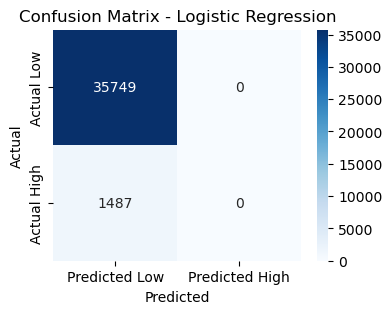

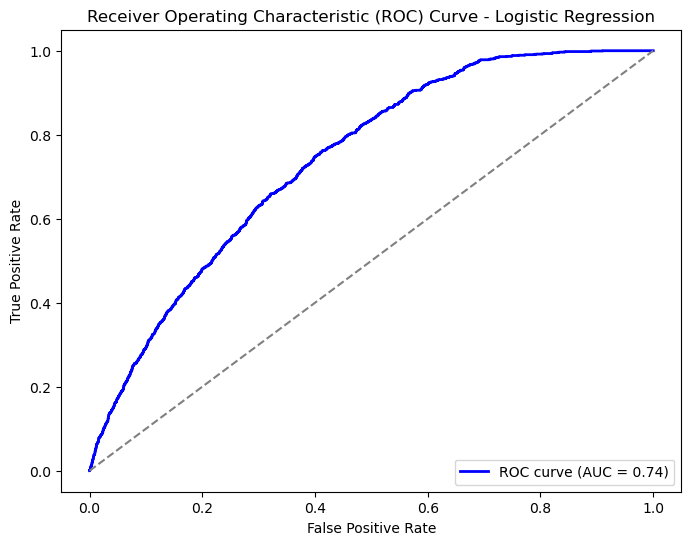

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

accuracy = accuracy_score(y_valid, lr_y_pred)
conf_matrix = confusion_matrix(y_valid, lr_y_pred)
precision = precision_score(y_valid, lr_y_pred, average='weighted')
recall = recall_score(y_valid, lr_y_pred, average='weighted')
f1 = f1_score(y_valid, lr_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

lr_y_pred_proba = lr_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, lr_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 2: </b> Decision Tree Classifier </div>

In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_valid)
dt_accuracy = accuracy_score(y_valid, dt_y_pred)
print("Accuracy: " + str(dt_accuracy))

dt_auc = roc_auc_score(y_valid, dt_y_pred) 
print("AUC: " + str(dt_auc))

Accuracy: 0.9671822967021162
AUC: 0.8430473071768053


Confusion Matrix:
[[34961   788]
 [  434  1053]]
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F-measure: 0.97
Specificity: 0.98


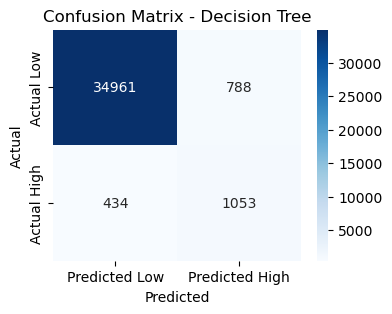

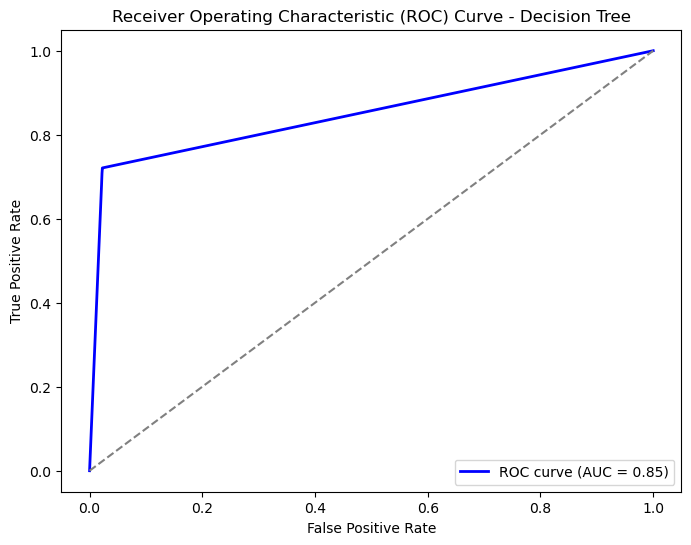

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_valid, dt_y_pred)
conf_matrix = confusion_matrix(y_valid, dt_y_pred)
precision = precision_score(y_valid, dt_y_pred, average='weighted')
recall = recall_score(y_valid, dt_y_pred, average='weighted')
f1 = f1_score(y_valid, dt_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

dt_y_pred_proba = dt_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, dt_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 3: </b> Random Forest Classifier </div>

In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_y_pred)
print("Accuracy: " + str(rf_accuracy))

rf_auc = roc_auc_score(y_valid, rf_y_pred) 
print("AUC: " + str(rf_auc))

Accuracy: 0.986196154259319
AUC: 0.8429595888075875


Confusion Matrix:
[[35700    49]
 [  465  1022]]
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F-measure: 0.99
Specificity: 1.00


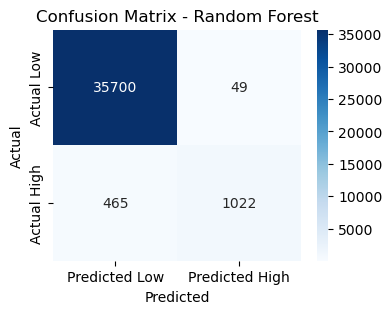

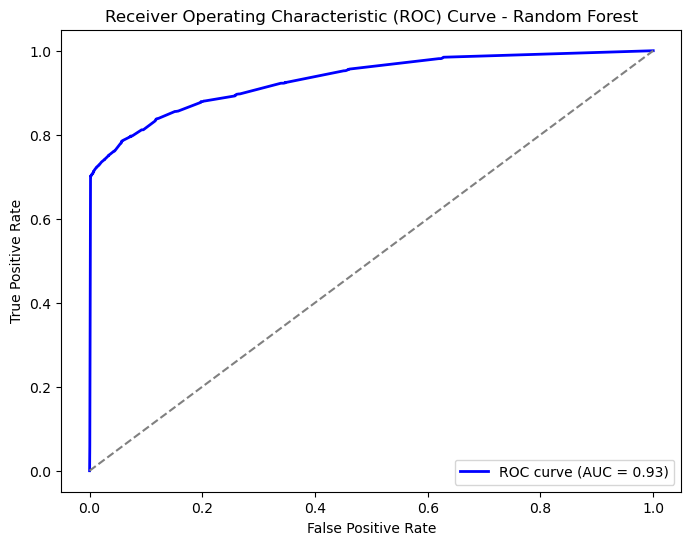

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

accuracy = accuracy_score(y_valid, rf_y_pred)
conf_matrix = confusion_matrix(y_valid, rf_y_pred)
precision = precision_score(y_valid, rf_y_pred, average='weighted')
recall = recall_score(y_valid, rf_y_pred, average='weighted')
f1 = f1_score(y_valid, rf_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

rf_y_pred_proba = rf_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, rf_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 4: </b> K-Nearest Neighbors Classifier </div>

In [29]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_valid)
knn_accuracy = accuracy_score(y_valid, knn_y_pred)
print("Accuracy: " + str(knn_accuracy))

knn_auc = roc_auc_score(y_valid, knn_y_pred) 
print("AUC: " + str(knn_auc))

Accuracy: 0.9545063916639811
AUC: 0.5699358166028053


Confusion Matrix:
[[35316   433]
 [ 1261   226]]
Accuracy: 0.95
Precision: 0.94
Recall: 0.95
F-measure: 0.95
Specificity: 0.99


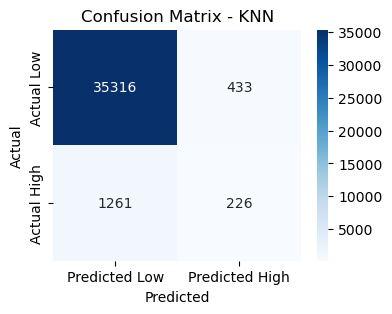

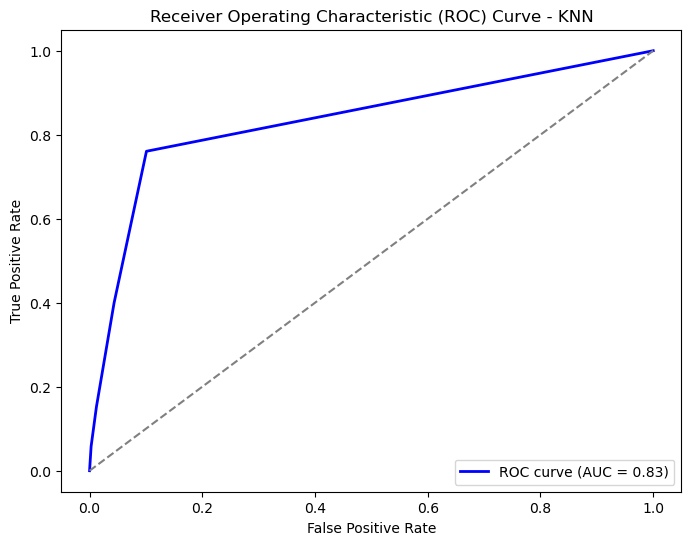

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(y_valid, knn_y_pred)
conf_matrix = confusion_matrix(y_valid, knn_y_pred)
precision = precision_score(y_valid, knn_y_pred, average='weighted')
recall = recall_score(y_valid, knn_y_pred, average='weighted')
f1 = f1_score(y_valid, knn_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

knn_y_pred_proba = knn_model.predict_proba(X_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(y_valid, knn_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()


#### <div class="alert alert-block alert-danger"> <b>Model 5: </b> SVM with Linear Kernel </div>

Since linear SVM is O(n^3), and the training dataset is large, it would take a lot of operations to train the model. Therefore we will only use 10000 datapoints total.

In [31]:
svm_train = training.sample(10000)
svm_X_train = svm_train[song_features]
svm_y_train = svm_train['popularity']
svm_X_test = song_data.drop(svm_train.index)[song_features]
svm_X_train, X_valid_LSVC, svm_y_train, svm_y_valid = train_test_split(svm_X_train, svm_y_train, test_size = 0.2, random_state = 420)

In [32]:
svm_model = DecisionTreeClassifier()
svm_model.fit(svm_X_train, svm_y_train)
svm_y_pred = svm_model.predict(X_valid_LSVC)
svm_accuracy = accuracy_score(svm_y_valid, svm_y_pred)
print("Accuracy: " + str(svm_accuracy))

svm_auc = roc_auc_score(svm_y_valid, svm_y_pred) 
print("AUC: " + str(svm_auc))

Accuracy: 0.9145
AUC: 0.5438740378895759


Confusion Matrix:
[[1817   96]
 [  75   12]]
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F-measure: 0.92
Specificity: 0.95


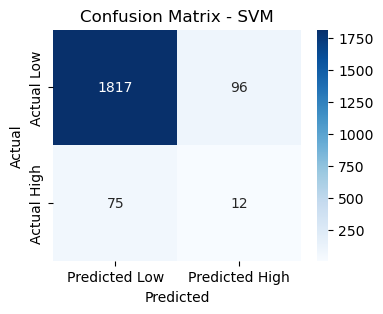

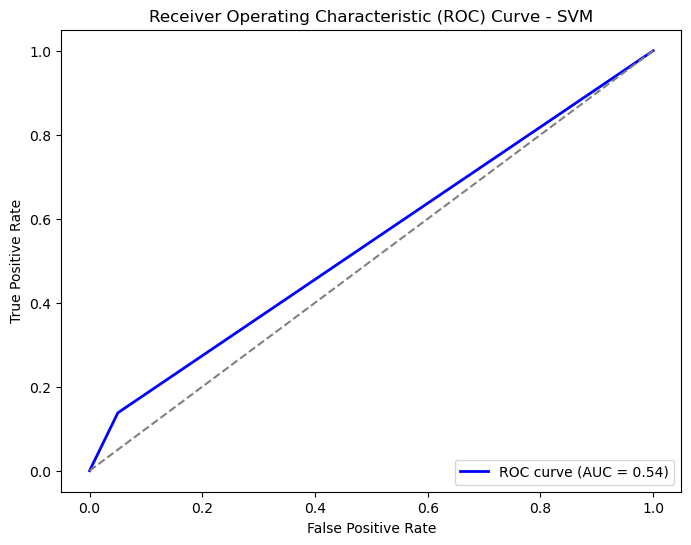

In [33]:
accuracy = accuracy_score(svm_y_valid, svm_y_pred)
conf_matrix = confusion_matrix(svm_y_valid, svm_y_pred)
precision = precision_score(svm_y_valid, svm_y_pred, average='weighted')
recall = recall_score(svm_y_valid, svm_y_pred, average='weighted')
f1 = f1_score(svm_y_valid, svm_y_pred, average='weighted')

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F-measure: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

svm_y_pred_proba = svm_model.predict_proba(X_valid_LSVC)[:, 1]

fpr, tpr, thresholds = roc_curve(svm_y_valid, svm_y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.show()





#### <div class="alert alert-block alert-danger"> <b>Model 6: </b> Feedforward Neural Network </div>

In [34]:
nn_model = Sequential()

nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

eval_metrics = nn_model.evaluate(X_valid, y_valid)
print(f"Accuracy: {eval_metrics[1]}")

nn_y_pred = nn_model.predict(X_valid)

nn_auc = roc_auc_score(y_valid, nn_y_pred)
print(f"AUC: {nn_auc}")

Epoch 1/10
4655/4655 [==============================] - 12s 2ms/step - loss: 0.1495 - accuracy: 0.9611 - val_loss: 0.1495 - val_accuracy: 0.9601
Epoch 2/10
4655/4655 [==============================] - 11s 2ms/step - loss: 0.1453 - accuracy: 0.9615 - val_loss: 0.1489 - val_accuracy: 0.9601
Epoch 3/10
4655/4655 [==============================] - 11s 2ms/step - loss: 0.1441 - accuracy: 0.9615 - val_loss: 0.1488 - val_accuracy: 0.9601
Epoch 4/10
4655/4655 [==============================] - 11s 2ms/step - loss: 0.1436 - accuracy: 0.9616 - val_loss: 0.1479 - val_accuracy: 0.9601
Epoch 5/10
4655/4655 [==============================] - 11s 2ms/step - loss: 0.1428 - accuracy: 0.9616 - val_loss: 0.1488 - val_accuracy: 0.9601
Epoch 6/10
4655/4655 [==============================] - 11s 2ms/step - loss: 0.1422 - accuracy: 0.9616 - val_loss: 0.1485 - val_accuracy: 0.9601
Epoch 7/10
4655/4655 [==============================] - 11s 2ms/step - loss: 0.1416 - accuracy: 0.9616 - val_loss: 0.1500 - val_ac

   1/1164 [..............................] - ETA: 44s1164/1164 [==============================] - 1s 1ms/step


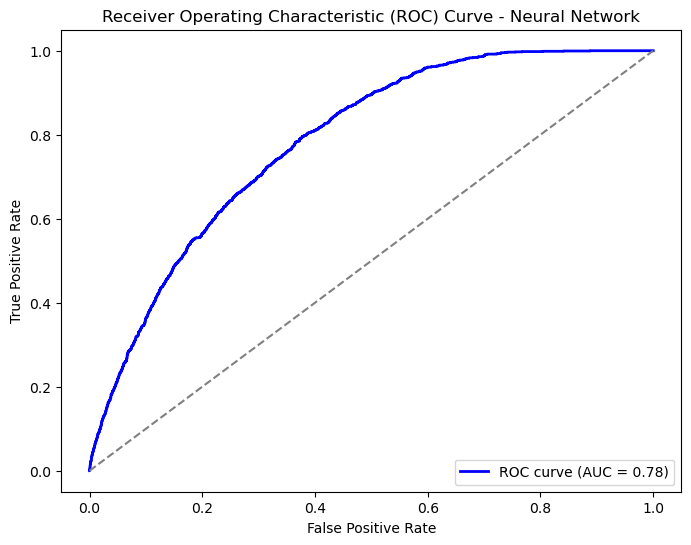

In [35]:
nn_y_pred_proba = nn_model.predict(X_valid)

fpr, tpr, thresholds = roc_curve(y_valid, nn_y_pred_proba)
nn_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % nn_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Neural Network')
plt.legend(loc='lower right')
plt.show()

<div class="alert alert-block alert-info">
<b>Model Performance</b></div>


In [36]:
model_performance_accuracy = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
    'Accuracy': [lr_accuracy, rf_accuracy, knn_accuracy, dt_accuracy, svm_accuracy]
})

model_performance_AUC = pd.DataFrame({
    'Model': ['LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC'],
    'AUC': [lr_auc, rf_auc, knn_auc, dt_auc, svm_auc]
})


In [37]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.986196
3,DecisionTreeClassifier,0.967182
0,LogisticRegression,0.960066
2,KNeighborsClassifier,0.954506
4,LinearSVC,0.914500


In [38]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

,Model,AUC
3,DecisionTreeClassifier,0.843047
1,RandomForestClassifier,0.842960
2,KNeighborsClassifier,0.569936
4,LinearSVC,0.543874
0,LogisticRegression,0.500000


<div class="alert alert-block alert-success">
<b>Results</b> 

- We looked at data from songs on Spotify. We used details like the music's key, mood, and dance style to guess how popular a song might be (if it's rated higher than 70 out of 100) and didn't rely on things like the artist's name, music type, or when the song was released.

- The best method we used was the Random Forest Classifier. It guessed accurately about 98 out of 100 times and scored about 84 out of 100 when measuring its performance. The next best method was the Decision Tree Classifier. It got it right about 96 out of 100 times and scored around 84 out of 100 in its performance.

</div>



<div class="alert alert-block alert-info">
<b>References:</b>

1. Halilovic, I. (2021, July 30). Markdown for Jupyter notebooks cheatsheet - Inge Halilovic - Medium. Medium. https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
2. Scribbr. (2021, July 30). Free APA citation Generator | with Chrome Extension - Scribbr. https://www.scribbr.com/citation/generator/apa/
3. Zach. (2023). How to create a distribution plot in Matplotlib. Statology. https://www.statology.org/matplotlib-distribution-plot/
4. seaborn.displot — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.displot.html
5. Lau, C. H. (2021, December 7). 5 steps of a Data Science Project Lifecycle - towards Data Science. Medium. https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
6. Are hit songs becoming less musically diverse? (n.d.). The Pudding. https://pudding.cool/2018/05/similarity/
7. Nasreldin, M. (2018, July 2). Song Popularity Predictor - towards Data science. Medium. https://towardsdatascience.com/song-popularity-predictor-1ef69735e380
8. Seaborn.Heatmap — seaborn 0.13.0 documentation. (n.d.). Pydata.org. Retrieved October 3, 2023. https://seaborn.pydata.org/generated/seaborn.heatmap.html
9. IBM documentation. (2021, April 8). Ibm.com. https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooksmarkdown-jupyter-cheatsheet
10. Spotify Tracks DB. (2019, July 23). Kaggle. https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv
</div>